In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# **my code without using CV**

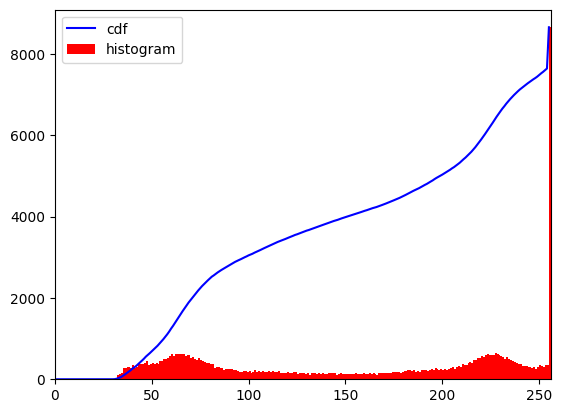

In [2]:
img = cv.imread('EightAM.png', cv.IMREAD_GRAYSCALE)
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [3]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


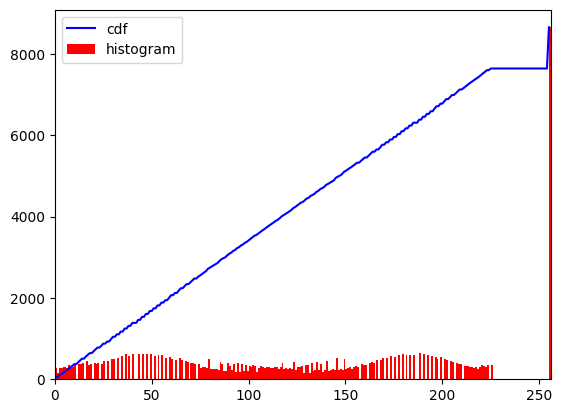

In [4]:
img2 = cdf[img]
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



In [5]:
res_mine = np.hstack((img,img2)) #stacking images side-by-side
cv.imwrite('res1.png',res_mine)


True

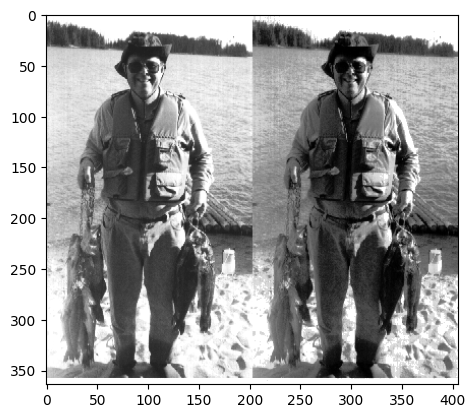

In [6]:
plt.imshow(res_mine, cmap='gray')


# **using opencv**

In [7]:
equ = cv.equalizeHist(img)


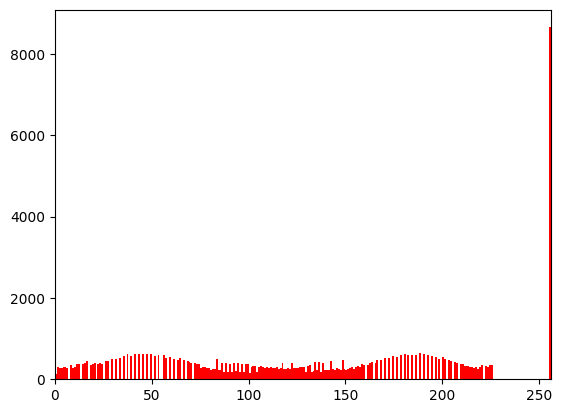

In [8]:


plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()



In [9]:

res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)


True

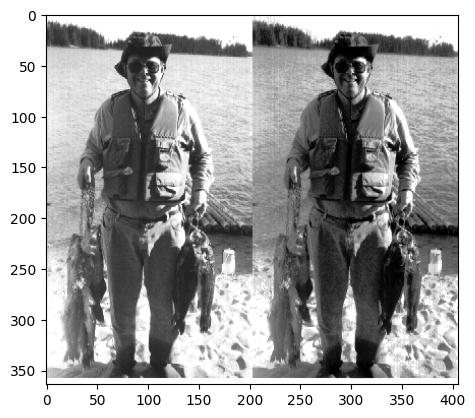

In [10]:

plt.imshow(res, cmap='gray')

